#**(5)Random Forest(Supervised learning, Classification & Regression problems Based)**

- It is based on the concept of **ensemble learning,** which is a process of **combining multiple classifiers to solve a complex problem** and to improve the performance of the model.

- Random forests **creates decision trees on randomly selected data samples**, gets prediction from each tree and selects the best solution by means of voting.

- **Random Forest is based on Bagging ensemble algorithm** that fits random dataset on different decision trees, then takes their majority vote for classification and average in case of regression.

- The greater number of trees in the forest leads to **higher accuracy and prevents the problem of overfitting.**

- It can work on both categorical and continuous dependent variables.

- Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset  and **takes their majority vote for classification and average in case of regression.**


<figure align="center">
<img src="https://drive.google.com/uc?id=1PbCgHKJXcdii6jEHWP7joxUdkVcZqlWd" height="200px", width="300px"> 
</figure>



#**Bagging &  Boosting**

- Bagging is an ensemble algorithm that **fits  random dataset on different  decision trees, then  takes their majority vote for classification and average in case of regression.**

- Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting.**For example, Random Forest.**

- Boosting– It combines weak learners into strong learners by creating sequential learning(mistakes of previous models are learned by their successors) models such that the final model has the highest accuracy. **For example,ADA BOOST, XG BOOST**

- In Bagging the sub-modul(decision trees) are independent to each other,where in the case of Boosting the performance of sub-modul are depend on each other.

- In Bagging fully grown decision trees are used ,where in Boosting  stumps(decision tree having one root and two leaves) are used rather than trees.


#**Model building in Scikit-learn:**
- Let's build the diabetes prediction model.
- Here, we are going to predict diabetes using Random Forest - Classifier.
- Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function.

In [ ]:
from google.colab import drive     #mount your Google Drive in your virtual machine(VM).
drive.mount('/gdrive')              #Access  the data  drive because of different server of colab and drive.

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import RandomForest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
pima=pd.read_csv('/gdrive/My Drive/ML Project /Feature Engineering /4.ML Algorithms/diabetes.csv',quoting=3)
                                 #Read data file with path location step by step path location from My Drive.

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now,we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols] # Features/independent variables
y = pima.Outcome # Target variable/dependent variables


# or Also we can write above code as this also. 
X = pima.drop('Outcome', axis=1)   #Features/independent variables
y = pima['Outcome']               # Target variable/dependent variables

Let's split dataset by using function train_test_split().

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Since, we have different range of features so we need to apply Feature Scaling techniques to bring features in same scale.

In [ ]:
#Feature Scaling techniques to bring features in same scale.
from sklearn.preprocessing import RobustScaler # Or we can also use StandardScaler,MinMaxScaler depending on the dataset.
rb = RobustScaler()  
X_train = rb.fit_transform(X_train)
X_test = rb.transform(X_test)

pd.DataFrame(X_train )   ##Convert numpy array generated by sklearn libraries to orginal dataframe.
pd.DataFrame(X_test )    ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0,1,2,3,4,5,6,7
0,0.6,-0.475,-0.8750,0.31250,1.193798,0.206186,0.150943,0.823529
1,-0.2,-0.125,0.1875,0.28125,-0.279070,0.381443,-0.609164,-0.470588
2,-0.2,-0.225,-0.5000,-0.71875,-0.279070,-0.123711,-0.582210,-0.470588
3,1.0,-0.250,0.5000,-0.71875,-0.279070,-0.762887,1.299191,0.294118
4,0.8,0.475,1.1250,-0.71875,-0.279070,-0.216495,-0.442049,1.235294
...,...,...,...,...,...,...,...,...
226,-0.6,0.050,-4.5000,-0.71875,-0.279070,0.041237,-0.628032,-0.294118
227,0.2,-0.200,-0.5000,0.65625,0.488372,0.288660,1.431267,-0.176471
228,-0.6,0.250,0.5000,0.43750,1.348837,0.443299,1.159030,-0.352941
229,0.6,-0.300,-0.1250,0.28125,0.248062,-0.123711,-0.679245,0.470588


Lets ,import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit our model on the train set using fit() and perform prediction on the test set using predict().



In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a  Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets.
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

After training, check the accuracy using actual and predicted values.

In [ ]:
#Predict the response for test dataset
y_pred=clf.predict(X_test)
pd.DataFrame(y_pred)        ##Convert numpy array generated by sklearn libraries to orginal dataframe.

,0
0,0
1,0
2,0
3,0
4,0
...,...
226,0
227,0
228,0
229,0


Model Evaluation using Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


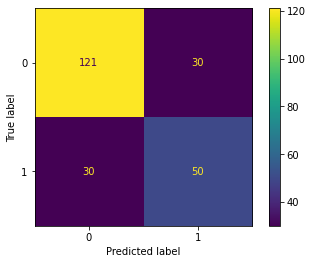

In [ ]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[121,  30],
       [ 30,  50]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7402597402597403


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)

0.625


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

0.625


In [ ]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, y_pred)
print(f1_score)

0.625


#**Optimizing RandomForest Performance**
- Lets use  parameter  **“gini” for the Gini index and “entropy” for the information gain.**

In [ ]:
# Create RandomForest classifer object
clf = RandomForestClassifier(criterion="gini", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663
